# SYMPY

Tutorial [aqui](https://calclab.math.tamu.edu/Python/Lab4_151Overview.pdf) e [aqui](https://scipy-lectures.org/packages/sympy.html).

Resolução numérica de parte do problema II da série 3 de quântica

In [1]:
import numpy as np
from sympy import *
from sympy.plotting import plot, plot3d
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2

In [3]:
a, b = symbols('a b')

f  = (2 + 2*cos(2*np.pi*b))*(16*a*b)**2/((np.pi*(16*b**4 - 40*b**2 + 9)))**2
df = diff(f, b)

#diff((2 + 2*cos(2*np.pi*b))*(16*a*b)/((np.pi*(16*b**4 - 40*b**2 + 9)))**2, b)

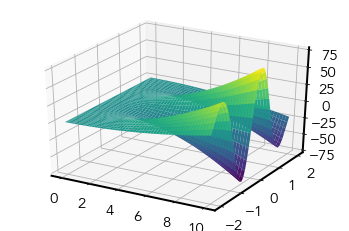

In [4]:
plot3d(df, (a, 0, 10), (b, -2, 2))

Assumindo a arbitrário:

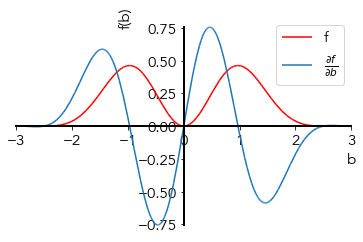

In [5]:
const = 1 #Valor que a variável a vai assumir

p = plot(f.subs(a, const), df.subs(a, const), (b, -3, 3), show=False, legend=True)

p[0].line_color = 'red'

p[0].label = r'f'
p[1].label = r'$\frac{\partial f}{\partial b}$'

p.show()

# Encontrar 0's com Sympy

Tutorial [aqui](https://pythonforundergradengineers.com/sympy-expressions-and-equations.html)

In [6]:
help(nsolve)

Help on function nsolve in module sympy.solvers.solvers:

nsolve(*args, **kwargs)
    Solve a nonlinear equation system numerically::
    
        nsolve(f, [args,] x0, modules=['mpmath'], **kwargs)
    
    f is a vector function of symbolic expressions representing the system.
    args are the variables. If there is only one variable, this argument can
    be omitted.
    x0 is a starting vector close to a solution.
    
    Use the modules keyword to specify which modules should be used to
    evaluate the function and the Jacobian matrix. Make sure to use a module
    that supports matrices. For more information on the syntax, please see the
    docstring of lambdify.
    
    If the keyword arguments contain 'dict'=True (default is False) nsolve
    will return a list (perhaps empty) of solution mappings. This might be
    especially useful if you want to use nsolve as a fallback to solve since
    using the dict argument for both methods produces return values of
    consistent t

In [7]:
nsolve(df.subs(a, 1), (0.1, 1))

0.970823039725795

# De Sympy para Matplotlib

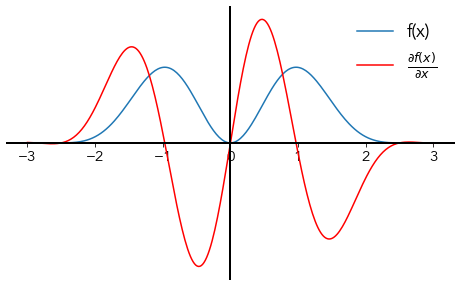

In [9]:
#1ª PARTE (PLOT NORMAL EM SYMPY)

const = 1 #Valor que a variável a vai assumir

p = plot(f.subs(a, const), df.subs(a, const), (b, -3, 3), show=False, legend=True)

p[0].line_color = 'red'

p[0].label = r'f'
p[1].label = r'$\frac{\partial f}{\partial b}$'

# collect (x,y)'s of the unseen curves 
x1y1 = p[0].get_points()  # array of 2D
x2y2 = p[1].get_points() 


#USAR MATPLOTLIB NORMAL COM OS DATA POINTS RECOLHIDOS

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()


# do subplot
ax.plot(x1y1[0], x1y1[1], label='f(x)')
ax.plot(x2y2[0], x2y2[1], label=r'$\frac{\partial f(x)}{\partial x}$', color='r')

#fig.subplots_adjust(wspace=0.4) # set space between subplots

#REFERENCIAL CARTESIANO
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

ax.set_yticks([])
ax.legend(frameon=False, fontsize=18)